###  1. 데이터 훈련 / 테스트 세트로 나누기

#### 1.1 데이터 불러오기  
① &nbsp; '케글'에서 당뇨병 데이터셋을 다운  

② &nbsp; 다운 받은 데이터셋.csv 파일을 깃허브에 업로드  

③ &nbsp; 판다스를 이용하여 RAW URL에서 데이터셋을 vs code로 불러옴  

④ &nbsp; 데이터가 잘 들어왔는지 `.head()`와 `.shape` 을 통해 확인

In [84]:
import pandas as pd

raw_url = 'https://raw.githubusercontent.com/fnzm159-oss/ai-study_miniproject_data/refs/heads/main/diabetes.csv'

df = pd.read_csv(raw_url)

print(df.head())
print()
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

(768, 9)


#### 1.2 결측값 처리  
① &nbsp; **'Pregnancies'**, **'DiabetesPedigreeFunction'**, **'Outcome'** 을 제외한 다른 항목에서 0값이 나오는 것은 결측값으로 간주  

② &nbsp; 결측값의 처리는 **KNN Imputer 클래스**를 사용  
&nbsp; &nbsp; &nbsp; : 데이터 패턴을 반영하여 단순한 중앙값 보다 현실적인 값으로 채워 모델 성능 향상의 경우가 많아 이 방법을 채택

③ &nbsp; 회의를 통해 'Insulin' 데이터는 제하기로 결정 (가정에서도 확인 가능한 수치를 통해서도 당뇨병을 예측할 수 있는 프로그램을 목표)

In [85]:
# 0값이 있을 경우 제거할 항목
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']

# KNNImputer 클래스를 사용하여 결측값 대치
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df[zero_cols] = imputer.fit_transform(df[zero_cols])

In [86]:
# 'Insulin'열을 제외
df = df.drop(columns = ['Insulin'], axis = 1)

# 제거됐는지 확인
print(df.head())
print()
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   
1            1     85.0           66.0           29.0  26.6   
2            8    183.0           64.0            0.0  23.3   
3            1     89.0           66.0           23.0  28.1   
4            0    137.0           40.0           35.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0        1  
1                     0.351  31.0        0  
2                     0.672  32.0        1  
3                     0.167  21.0        0  
4                     2.288  33.0        1  

(768, 8)


#### 1.3 데이터 훈련 / 테스트 세트 분류 
① &nbsp; 원본데이터가 이미 2차원 배열이 되어있어서 넘파이 없이 바로 데이터 세트와 타깃 세트로 분류 

② &nbsp; 데이터(= Outcome을 제외한 열), 타깃(= Outcome 열)

③ &nbsp; `train_test_split`을 이용하여 훈련 / 테스트 세트로 분류하기

> ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ오류 및 개선 사항ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

* 책의 내용과 같이 당뇨 그룹과 정상 그룹으로 나누고 각 속성을 합쳐서 순서대로 1과 0을 부여하여 데이터/타겟 세트로 나누려고 함  
* 재미나이한테 물어보니 아래와 같은 문제들이 발생하므로 원본 데이터에서 바로 데이터/타겟 세트로 나누는 것을 권장  
  
  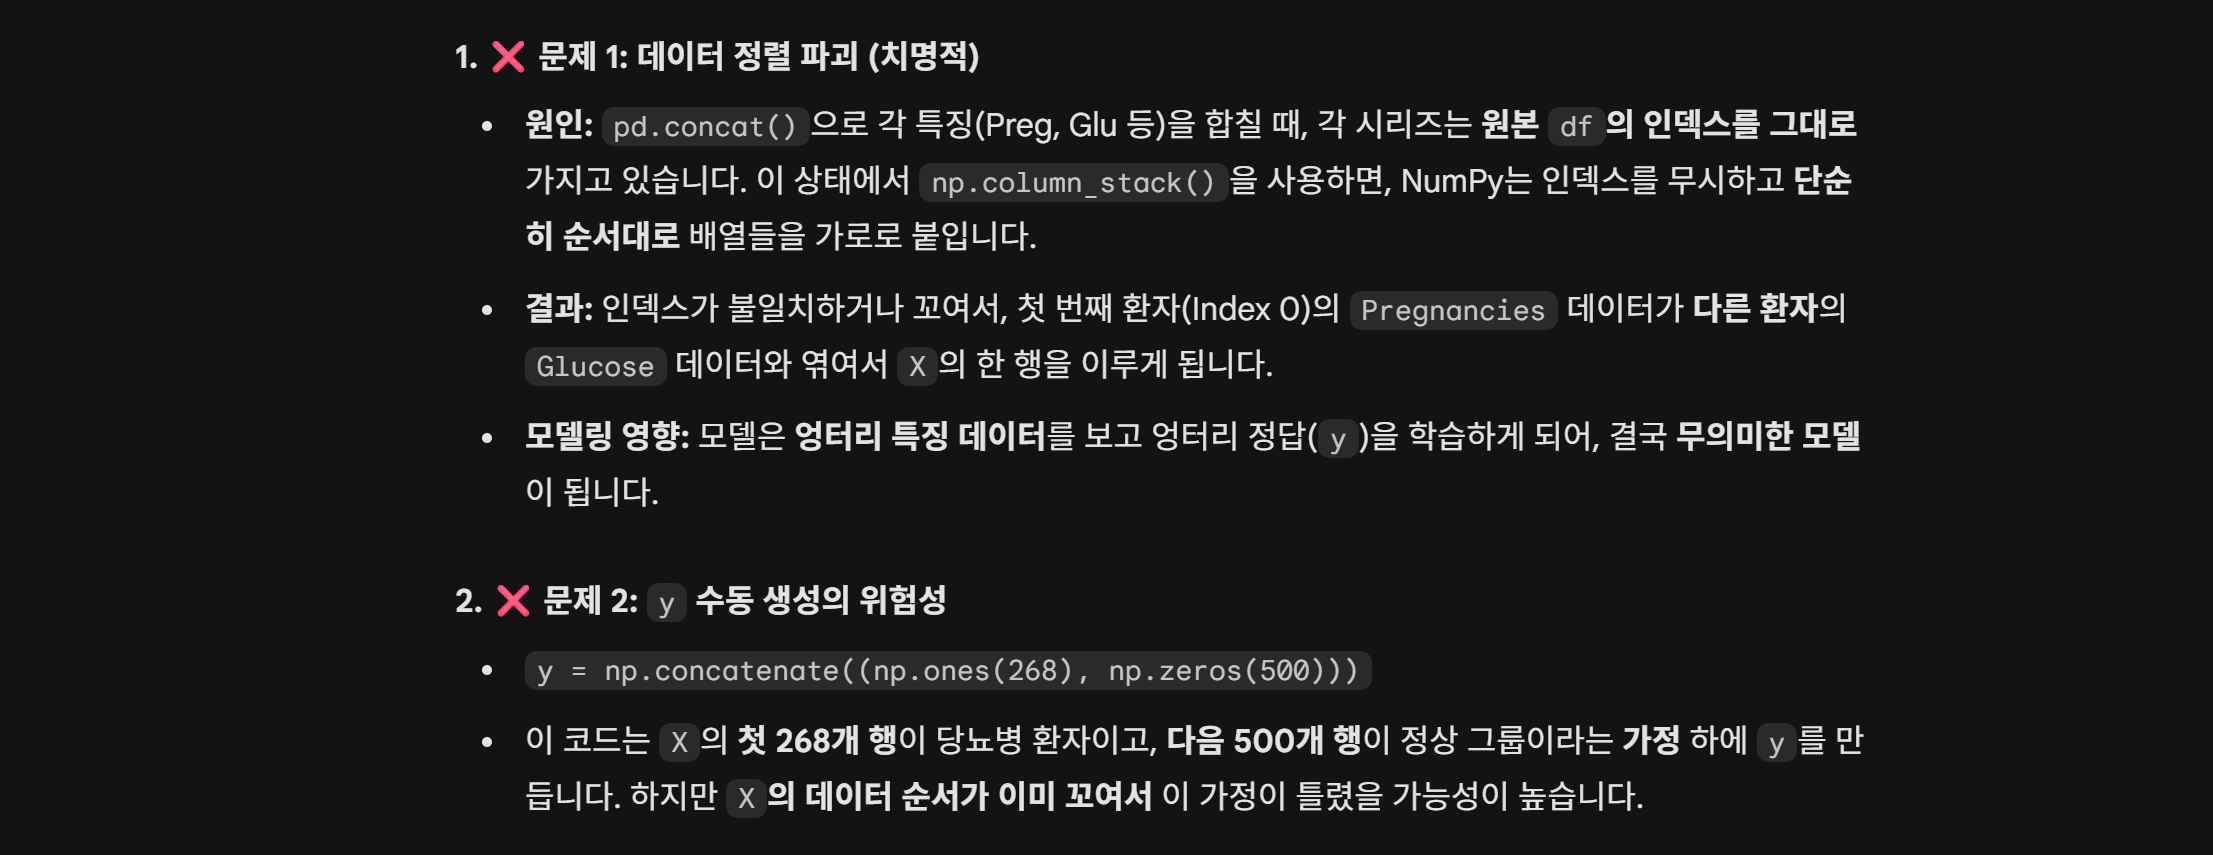


In [87]:
# [Outcome 1과 0으로 그룹을 나눔]
# df_diabetes = df[df['Outcome'] == 1]
# df_normal = df[df['Outcome'] == 0]

# print(f"당뇨병 환자 수 (Outcome = 1): {df_diabetes.shape[0]}명")
# print(f"정상 그룹 수 (Outcome = 0): {df_normal.shape[0]}명")

In [88]:
# [pd.concat()을 이용하여 두 그룹의 데이터를 합치기]
# Preg = pd.concat([df_diabetes['Pregnancies'], df_normal['Pregnancies']])
# Glu = pd.concat([df_diabetes['Glucose'], df_normal['Glucose']])
# BP = pd.concat([df_diabetes['BloodPressure'], df_normal['BloodPressure']])
# SkinT = pd.concat([df_diabetes['SkinThickness'], df_normal['SkinThickness']])
# BMI = pd.concat([df_diabetes['BMI'], df_normal['BMI']])
# DPF = pd.concat([df_diabetes['DiabetesPedigreeFunction'], df_normal['DiabetesPedigreeFunction']])
# Age = pd.concat([df_diabetes['Age'], df_normal['Age']])

In [89]:
# import numpy as np

# X = np.column_stack((Preg, Glu, BP, SkinT, BMI, DPF, Age))
# y = np.concatenate((np.ones(268), np.zeros(500)))

> ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [90]:
# 원본 데이터에서 바로 분류
X = df.drop('Outcome', axis = 1)   # 데이터 세트
y = df['Outcome']                  # 타겟 세트

In [91]:
print(X[:10])

   Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0            6    148.0           72.0           35.0  33.6   
1            1     85.0           66.0           29.0  26.6   
2            8    183.0           64.0            0.0  23.3   
3            1     89.0           66.0           23.0  28.1   
4            0    137.0           40.0           35.0  43.1   
5            5    116.0           74.0            0.0  25.6   
6            3     78.0           50.0           32.0  31.0   
7           10    115.0            0.0            0.0  35.3   
8            2    197.0           70.0           45.0  30.5   
9            8    125.0           96.0            0.0   0.0   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  31.0  
2                     0.672  32.0  
3                     0.167  21.0  
4                     2.288  33.0  
5                     0.201  30.0  
6                     0.248  26.0  
7                 

In [92]:
print(y[:10])

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64


In [93]:
# train_test_split을 이용하여 훈련 세트와 테스트 세트 나누기
# 개별로 실시하는 미니 프로젝트이므로 완성 후 스터디원과 정확한 비교를 위해 random_state = 42로 통일

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X, y, random_state = 42)

In [94]:
print(train_input.shape, test_input.shape)

(576, 7) (192, 7)


In [95]:
print(train_target.shape, test_target.shape)

(576,) (192,)


In [96]:
# 테스트 데이터에서 잘 섞였는지 확인
print(test_target.value_counts())

Outcome
0    123
1     69
Name: count, dtype: int64


테스트 세트의 비율이 약 1.78:1로 나온 것으로 샘플링 편향이 조금 나타남  
`stratify`매개변수에 타깃 데이터 전달하여 비울 맞추기

In [97]:
train_input, test_input, train_target, test_target = train_test_split(X, y, stratify = y, random_state = 42)
print(test_target.value_counts())

Outcome
0    125
1     67
Name: count, dtype: int64


약 1.87:1로 약간은 높아진 데이터를 얻음

###  2. 데이터 전처리

#### 1.1 표준점수와 표준편차  

In [98]:
import numpy as np

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)

Pregnancies                   3.831597
Glucose                     120.767361
BloodPressure                69.170139
SkinThickness                20.723958
BMI                          32.064583
DiabetesPedigreeFunction      0.480200
Age                          33.536458
dtype: float64 Pregnancies                  3.309987
Glucose                     31.743788
BloodPressure               18.683648
SkinThickness               15.863519
BMI                          7.854205
DiabetesPedigreeFunction     0.332899
Age                         11.868436
dtype: float64


In [99]:
train_scaled = (train_input - mean) / std